## 1a) read in tweet_counts.csv using pandas, find mean tweet count

In [1]:
#import sys
#!{sys.executable} -m pip install matplotlib

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [19]:
tweet_counts=pd.read_csv('/home/justin/Documents/PHYS247/tweet_counts.csv')
tweet_counts["count"].mean()

38.76923076923077

## 1b) Use matplotlib.pyplot.bar to create the same figure

Text(0.5, 1.0, 'Weekly tweet counts')

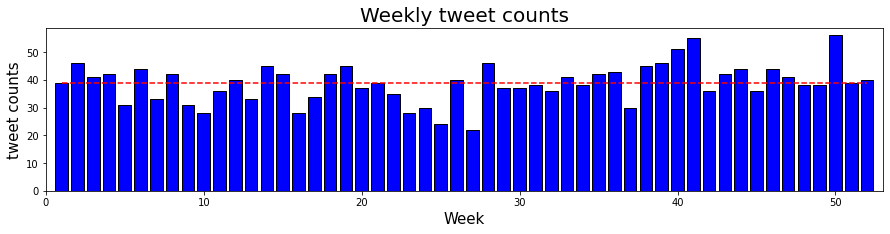

In [20]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(1,53),tweet_counts["count"], color='blue',edgecolor='black')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)
plt.hlines(tweet_counts["count"].mean(),1,52,colors='red',linestyles='dashed')

plt.title('Weekly tweet counts', fontsize=20)

In [21]:
# convert tweet_counts into numpy array
tweet_data=np.array(tweet_counts["count"])
tweet_data

array([39., 46., 41., 42., 31., 44., 33., 42., 31., 28., 36., 40., 33.,
       45., 42., 28., 34., 42., 45., 37., 39., 35., 28., 30., 24., 40.,
       22., 46., 37., 37., 38., 36., 41., 38., 42., 43., 30., 45., 46.,
       51., 55., 36., 42., 44., 36., 44., 41., 38., 38., 56., 39., 40.])

# c) Prove explicitly that the expected value of $\lambda$ is $1/\alpha$

Expected value of λ = $\int λ P(λ) dλ$

= $\int λ \alpha e^{-\lambda\alpha} d\lambda$

= $ (1/2) λ^2 \alpha \lambda (1/ \alpha) $

= $1/\alpha$

## d) Take the average value of $\lambda$ from part "a" to estimate $\alpha$. Plot the estimated distribution function (P($\lambda$) vs $\lambda$).

Estimated $\lambda$ = $1/\alpha$

In [22]:
# can't use greek letters in code for some reason
λ_est = tweet_counts["count"].mean()
α = 1/λ_est
α

0.025793650793650796

In [23]:
Exponential=lambda λ,α: α*np.exp(-λ*α)
Exponential=np.vectorize(Exponential)

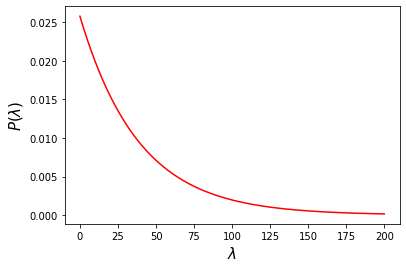

In [24]:
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),α),c='r')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$P(\lambda)$', fontsize=15)
plt.show()

## e) define model spaces. Describe method to find posterior for each point

In [38]:
λ1_space = np.linspace(25,50,50)
λ2_space = np.linspace(25,50,50)
Ws_space = np.arange(1,53)

Using Bayes' theorem, calculate posterior for each point. The likelihood function of P(data|λ1, λ2, Ws) is poisson distribution with constant of λ1 if W<W_s or λ2 if W>W_s. The priors of λ1 and λ2 are the exponential function and the prior of W is the constant (1/52). After finding the posteriors, integrate over one of the variables (λ1, λ2, Ws) to obtain probability distribution for it. 

## f) calculate and plot the marginalized-posteriors

In [39]:
Poisson=lambda k,λ : (λ**k)*np.exp(-λ)/np.math.factorial(k)
Poisson=np.vectorize(Poisson)

Exponential=lambda λ,a: a*np.exp(-λ*a)
Exponential=np.vectorize(Exponential)

# this function not returning posteriors. Don't understand np.prod or how to use to multiply vectorized functions 
def Posterior_tweet(λ1, λ2, Ws):
    P=1
    w=0
    for i in tweet_data[w<Ws]:
        P=P*Poisson(i,λ1)*α*np.exp(-α*λ1)
        
    for j in tweet_data[w>=Ws]:
        P=P*Poisson(i,λ2)*α*np.exp(-α*λ2)
    return(P)

In [41]:
P_=np.array([])
# dummy empty array to hold un-normalized posterior likelihoods
for λ1 in λ1_space:
    for λ2 in λ2_space:
        for Ws in Ws_space:
            P_=np.append(P_,Posterior_tweet(λ1, λ2, Ws))

In [16]:
# Use the integral of 3D posterior over the two other parameters to get the marginalized posterior.
# use np.sum over two axes to get 2-D posterior, and then np.sum again to get get 1-D posterior.
# Since the λ1_est and λ2_est intervals are the same, summation will return unnormalized integral.
# Apply the normalization at the end when you have 1D posterior, meaning that the area underneath the 1D posterior should be 1.

## g) analyze results of posterior plots 

I did not complete part f, but if I had, I would examine the plots to find the most likely values for λ1, λ2, Ws. I would look at the Ws plot to see when the change was most likely to occur.

I would use the marginalized 2-D posterior to estimate the probability that λ1-λ2>5.